<a href="https://colab.research.google.com/github/mohnish-srikanth/stock-prediction-ml/blob/master/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
from numpy import array
import numpy.polynomial.polynomial as poly
import pandas as pd
import datetime as dt
import seaborn
import matplotlib.pylab as plt
import os
import random
import shutil
import glob
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [6]:
seaborn.set(rc={'figure.figsize':(16,8.27)})

In [7]:
df = pd.read_csv('indexData.csv')

In [8]:
df.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112457 entries, 0 to 112456
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Index      112457 non-null  object 
 1   Date       112457 non-null  object 
 2   Open       110253 non-null  float64
 3   High       110253 non-null  float64
 4   Low        110253 non-null  float64
 5   Close      110253 non-null  float64
 6   Adj Close  110253 non-null  float64
 7   Volume     110253 non-null  float64
dtypes: float64(6), object(2)
memory usage: 6.9+ MB


In [10]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,110253.000000,110253.000000,110253.000000,110253.000000,110253.000000,1.102530e+05
mean,7658.515222,7704.372961,7608.000422,7657.545872,7657.351729,1.273975e+09
std,9011.478913,9066.638548,8954.506981,9011.510444,9011.608900,4.315783e+09
min,54.869999,54.869999,54.869999,54.869999,54.869999,0.000000e+00
25%,1855.030029,1864.510010,1843.979980,1855.060059,1854.179565,0.000000e+00
50%,5194.089844,5226.279785,5154.049805,5194.750000,5194.750000,4.329000e+05
75%,10134.299810,10207.820310,10060.349610,10134.830080,10134.830080,1.734314e+08
max,68775.062500,69403.750000,68516.992190,68775.062500,68775.062500,9.440374e+10


In [11]:
df.isnull().sum()

Index           0
Date            0
Open         2204
High         2204
Low          2204
Close        2204
Adj Close    2204
Volume       2204
dtype: int64

In [12]:
df["Date"] = pd.to_datetime(df["Date"])

In [13]:
df_NYA = df[df["Index"].isin(['NYA'])].sort_values('Date')

In [14]:
df_NYA

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.000000e+00
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.000000e+00
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.000000e+00
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.000000e+00
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.000000e+00
...,...,...,...,...,...,...,...,...
13943,NYA,2021-05-24,16375.000000,16508.519530,16375.000000,16464.689450,16464.689450,2.947400e+09
13944,NYA,2021-05-25,16464.689450,16525.810550,16375.150390,16390.189450,16390.189450,3.420870e+09
13945,NYA,2021-05-26,16390.189450,16466.339840,16388.320310,16451.960940,16451.960940,3.674490e+09
13946,NYA,2021-05-27,16451.960940,16546.359380,16451.960940,16531.949220,16531.949220,5.201110e+09


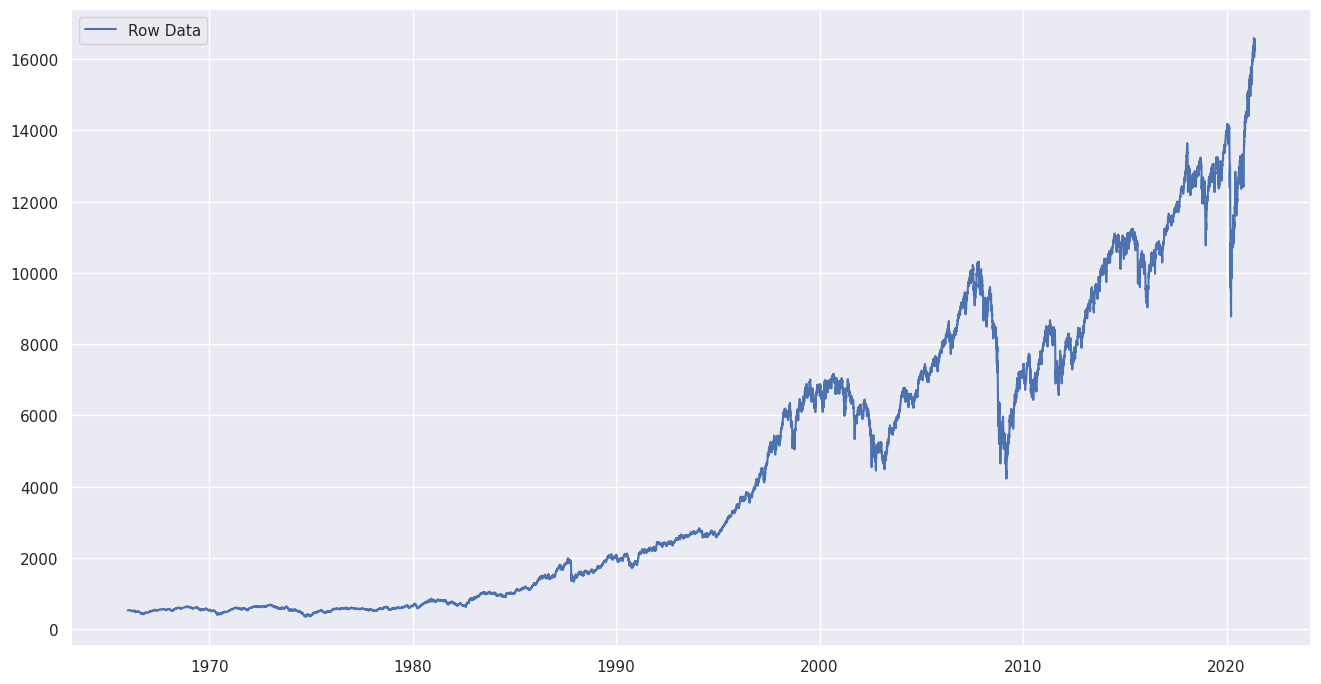

In [15]:
plt.plot(df_NYA["Date"],df_NYA["Close"],label='Row Data')
plt.legend()

In [16]:
df_NYA_data_close = df_NYA[["Date","Close"]]

In [17]:
df_NYA_data_close

,Date,Close
0,1965-12-31,528.690002
1,1966-01-03,527.210022
2,1966-01-04,527.840027
3,1966-01-05,531.119995
4,1966-01-06,532.070007
...,...,...
13943,2021-05-24,16464.689450
13944,2021-05-25,16390.189450
13945,2021-05-26,16451.960940
13946,2021-05-27,16531.949220


In [18]:
df_NYA_data_close.isnull().sum()

Date     0
Close    1
dtype: int64

In [19]:
df_NYA_data_close.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            13938, 13939, 13940, 13941, 13942, 13943, 13944, 13945, 13946,
            13947],
           dtype='int64', length=13948)

In [20]:
np.where(df_NYA_data_close['Close'].isnull())[0]

array([289])

In [21]:
df_NYA_data_close.iloc[[289]]

,Date,Close
289,1967-02-23,NaN


In [22]:
df_NYA_data_close_withoutnan = df_NYA_data_close.dropna()

In [23]:
df_NYA_data_close_withoutnan.isnull().sum()

Date     0
Close    0
dtype: int64

In [24]:
np.where(df_NYA_data_close_withoutnan['Close'].isnull())[0]

array([], dtype=int64)

In [25]:
data_train = df_NYA_data_close_withoutnan[df_NYA_data_close_withoutnan.Date < "2010-01-01"]
data_test = df_NYA_data_close_withoutnan[df_NYA_data_close_withoutnan.Date >= "2010-01-01"]

In [26]:
data_train

,Date,Close
0,1965-12-31,528.690002
1,1966-01-03,527.210022
2,1966-01-04,527.840027
3,1966-01-05,531.119995
4,1966-01-06,532.070007
...,...,...
11072,2009-12-24,7255.000000
11073,2009-12-28,7261.240234
11074,2009-12-29,7252.189941
11075,2009-12-30,7241.240234


In [27]:
data_train.Date = data_train.Date.map(dt.datetime.toordinal)

<ipython-input-27-a34754002ff0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train.Date = data_train.Date.map(dt.datetime.toordinal)


In [28]:
X_train = data_train.Date[:, np.newaxis]

<ipython-input-28-cad2fc0528cd>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = data_train.Date[:, np.newaxis]


In [29]:
X_train

array([[717701],
       [717704],
       [717705],
       ...,
       [733770],
       [733771],
       [733772]])

In [30]:
y_train = data_train.Close

In [31]:
y_train.isnull().sum()

0

In [35]:
tree = DecisionTreeRegressor(criterion='friedman_mse',max_depth=50).fit(X_train, y_train)

In [36]:
linear_reg = LinearRegression().fit(X_train, y_train)


In [37]:
model_rf = RandomForestRegressor(n_estimators=100).fit(X_train, y_train)

In [38]:
X_all = df_NYA_data_close_withoutnan.Date.map(dt.datetime.toordinal)[:, np.newaxis]

<ipython-input-38-a6067a0e8b85>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_all = df_NYA_data_close_withoutnan.Date.map(dt.datetime.toordinal)[:, np.newaxis]


In [39]:
X_all


array([[717701],
       [717704],
       [717705],
       ...,
       [737936],
       [737937],
       [737938]])

In [40]:
np.where(df_NYA_data_close_withoutnan['Date'] == '1966-01-05')[0]

array([3])

In [41]:
X_all[3]

array([717706])

In [42]:
pred_tree = tree.predict(X_all)
pred_model_rf = model_rf.predict(X_all)
pred_lr = linear_reg.predict(X_all)
X = np.array(data_train.Date)
y = np.array(data_train.Close)
model_coef_polyfit = poly.polyfit(X, y, 3)
X_new = np.array(df_NYA_data_close_withoutnan.Date.map(dt.datetime.toordinal))
ffit = poly.polyval(X_new, model_coef_polyfit)
X_new = pd.DataFrame(X_new,columns=['Date'])
X_new = X_new.Date.map(dt.datetime.fromordinal)

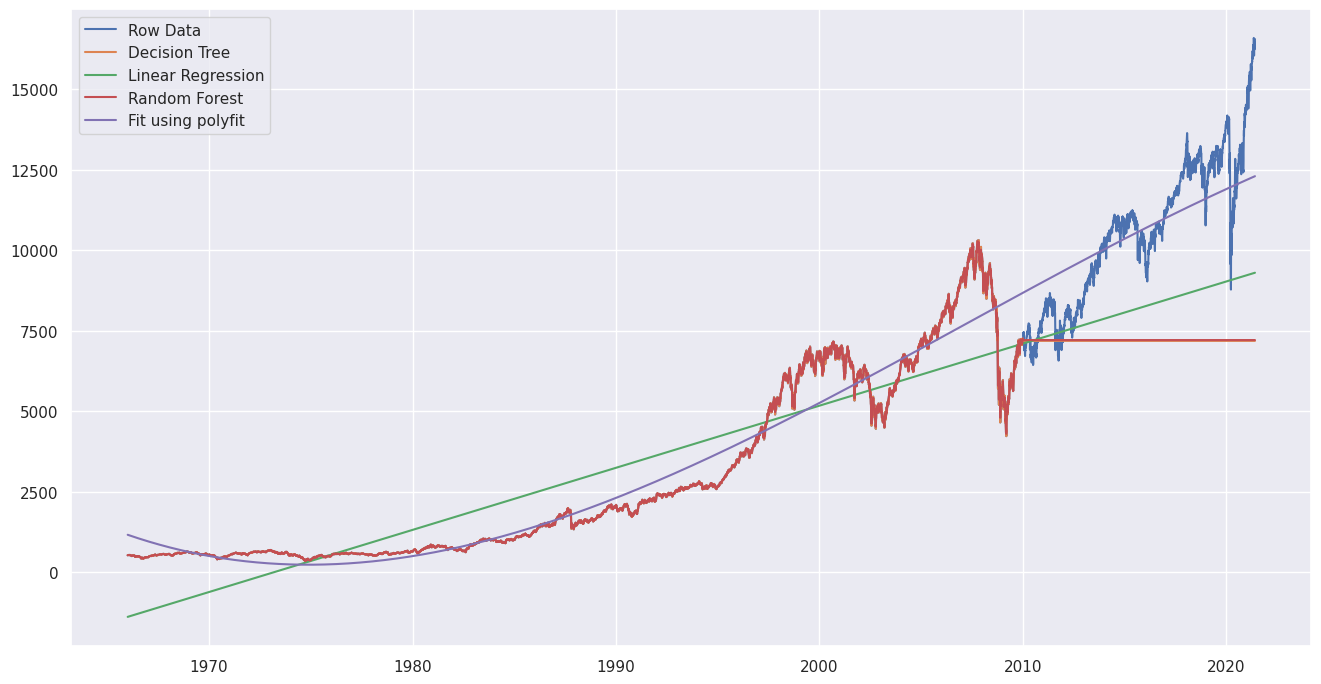

In [43]:
plt.plot(df_NYA_data_close_withoutnan.Date,df_NYA_data_close_withoutnan.Close,label='Row Data')
plt.plot(df_NYA_data_close_withoutnan.Date,pred_tree,label='Decision Tree')
plt.plot(df_NYA_data_close_withoutnan.Date,pred_lr,label='Linear Regression')
plt.plot(df_NYA_data_close_withoutnan.Date,pred_model_rf,label='Random Forest')
plt.plot(X_new,ffit,label='Fit using polyfit')
plt.legend()

In [44]:
tree.score(X_all,df_NYA_data_close_withoutnan.Close)

0.7973522670100477

In [45]:
linear_reg.score(X_all,df_NYA_data_close_withoutnan.Close)

0.8281145573435111

In [46]:
model_rf.score(X_all,df_NYA_data_close_withoutnan.Close)

0.7994386080982226

In [47]:
df_N100 = df[df["Index"].isin(['N100'])].sort_values('Date')

In [48]:
new_index = np.arange(0,len(df_N100.Close),1)

In [49]:
len(df_N100.Close)

5507

In [50]:
df_N100_data_close = df_N100[["Date","Close"]]
df_N100_data_close

,Date,Close
106950,1999-12-31,1000.000000
106951,2000-01-03,996.770020
106952,2000-01-04,955.969971
106953,2000-01-05,930.260010
106954,2000-01-06,922.460022
...,...,...
112452,2021-05-27,1247.069946
112453,2021-05-28,1256.599976
112454,2021-05-31,1248.930054
112455,2021-06-01,1258.579956


In [51]:
df_N100_data_close.index

Int64Index([106950, 106951, 106952, 106953, 106954, 106955, 106956, 106957,
            106958, 106959,
            ...
            112447, 112448, 112449, 112450, 112451, 112452, 112453, 112454,
            112455, 112456],
           dtype='int64', length=5507)

In [52]:
df_N100_data_close.isnull().sum()

Date      0
Close    33
dtype: int64

In [53]:
df_N100_data_close_withoutnan = df_N100_data_close.dropna()

In [54]:
len(df_N100_data_close_withoutnan.Close)

5474

In [55]:
df_N100_data_close_withoutnan.isnull().sum()

Date     0
Close    0
dtype: int64

In [56]:
data_train_N100 = df_N100_data_close_withoutnan[df_N100_data_close_withoutnan.Date < "2015-01-01"]
data_test_N100 = df_N100_data_close_withoutnan[df_N100_data_close_withoutnan.Date >= "2015-01-01"]

In [57]:
df_N100_data_close_withoutnan.index

Int64Index([106950, 106951, 106952, 106953, 106954, 106955, 106956, 106957,
            106958, 106959,
            ...
            112447, 112448, 112449, 112450, 112451, 112452, 112453, 112454,
            112455, 112456],
           dtype='int64', length=5474)

In [58]:
data_train_N100.Date = data_train_N100.Date.map(dt.datetime.toordinal)

<ipython-input-58-aa2d6fdde8eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train_N100.Date = data_train_N100.Date.map(dt.datetime.toordinal)


In [59]:
data_train_N100.Close

106950    1000.000000
106951     996.770020
106952     955.969971
106953     930.260010
106954     922.460022
             ...     
110811     846.840027
110812     843.859985
110813     846.969971
110814     834.340027
110815     839.520020
Name: Close, Length: 3834, dtype: float64

In [60]:
X_train_N100 = data_train_N100.Date[:, np.newaxis]
y_train_N100 = data_train_N100.Close

<ipython-input-60-131e3330f782>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train_N100 = data_train_N100.Date[:, np.newaxis]


In [63]:
tree_N100 = DecisionTreeRegressor(criterion='friedman_mse',max_depth=50).fit(X_train_N100, y_train_N100)
linear_reg_N100 = LinearRegression().fit(X_train_N100, y_train_N100)
model_rf_N100 = RandomForestRegressor(n_estimators=10).fit(X_train_N100, y_train_N100)

In [64]:
X_all_N100 = df_N100_data_close_withoutnan.Date.map(dt.datetime.toordinal)[:, np.newaxis]

<ipython-input-64-88f4120cc26c>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_all_N100 = df_N100_data_close_withoutnan.Date.map(dt.datetime.toordinal)[:, np.newaxis]


In [65]:
pred_tree_N100 = tree_N100.predict(X_all_N100)
pred_lr_N100 = linear_reg_N100.predict(X_all_N100)
pred_model_rf_N100 = model_rf_N100.predict(X_all_N100)

In [66]:
X_N100 = np.array(data_train_N100.Date)
y_N100 = np.array(data_train_N100.Close)
model_coef_polyfit = poly.polyfit(X_N100, y_N100, 2)
X_new_N100 = np.array(df_N100_data_close_withoutnan.Date.map(dt.datetime.toordinal))
ffit_N100 = poly.polyval(X_new_N100, model_coef_polyfit)
X_new_N100 = pd.DataFrame(X_new_N100,columns=['Date'])
X_new_N100 = X_new_N100.Date.map(dt.datetime.fromordinal)

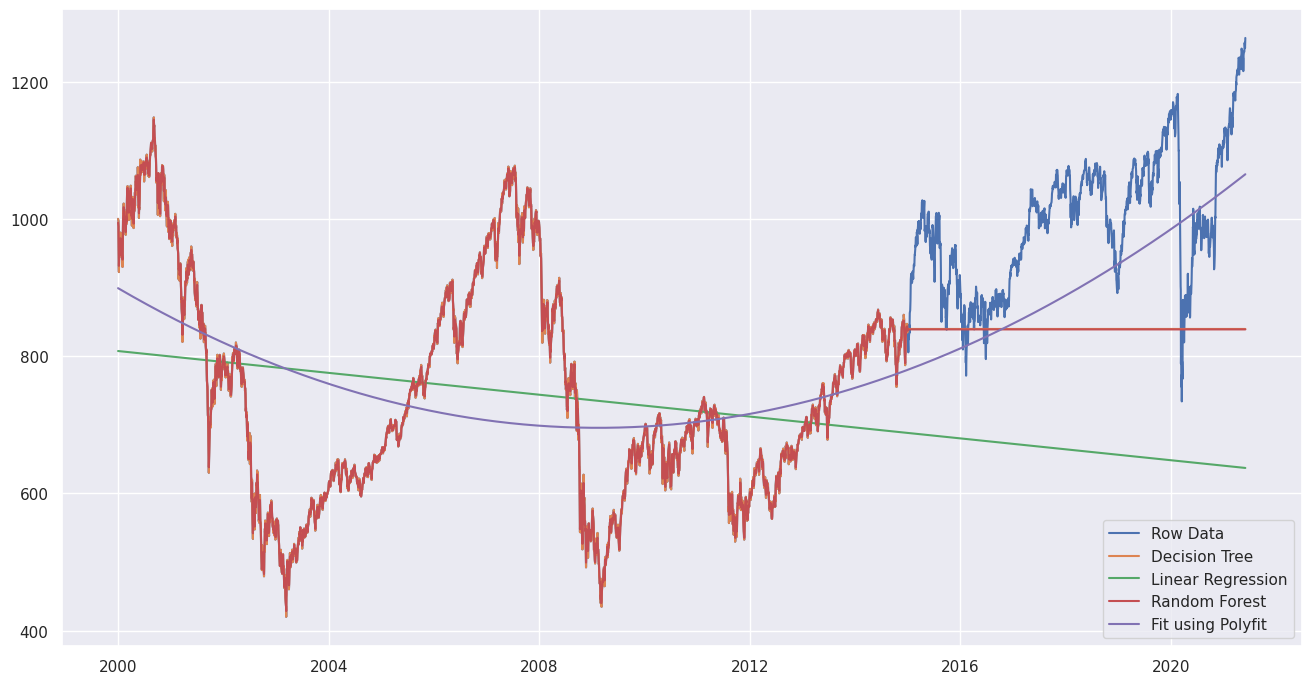

In [67]:
plt.plot(df_N100_data_close_withoutnan.Date,df_N100_data_close_withoutnan.Close,label='Row Data')
plt.plot(df_N100_data_close_withoutnan.Date,pred_tree_N100,label='Decision Tree')
plt.plot(df_N100_data_close_withoutnan.Date,pred_lr_N100,label='Linear Regression')
plt.plot(df_N100_data_close_withoutnan.Date,pred_model_rf_N100,label='Random Forest')
plt.plot(X_new_N100,ffit_N100,label='Fit using Polyfit')
plt.legend()

In [68]:
# split data into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [69]:
data_train = df_NYA_data_close_withoutnan[df_NYA_data_close_withoutnan.Date < "2010-01-01"]
data_test = df_NYA_data_close_withoutnan[df_NYA_data_close_withoutnan.Date >= "2010-01-01"]
data_train

,Date,Close
0,1965-12-31,528.690002
1,1966-01-03,527.210022
2,1966-01-04,527.840027
3,1966-01-05,531.119995
4,1966-01-06,532.070007
...,...,...
11072,2009-12-24,7255.000000
11073,2009-12-28,7261.240234
11074,2009-12-29,7252.189941
11075,2009-12-30,7241.240234


In [70]:
# choose a number of time steps
n_steps_in, n_steps_out = 10, 1
# split data into samples
X, y = split_sequence(data_train.Close, n_steps_in, n_steps_out)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
print(X.shape)

(11066, 10, 1)


In [71]:
# model
model = Sequential()
model.add(LSTM(200, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(200, activation='relu', return_sequences=True))
model.add(LSTM(200, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 200)           161600    
                                                                 
 lstm_1 (LSTM)               (None, 10, 200)           320800    
                                                                 
 lstm_2 (LSTM)               (None, 200)               320800    
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 803,401
Trainable params: 803,401
Non-trainable params: 0
_________________________________________________________________


In [72]:
# fit model
history = model.fit(X, y, epochs=10, verbose=2, validation_split=0.33)

Epoch 1/10
232/232 - 26s - loss: 414622.0000 - accuracy: 0.0000e+00 - val_loss: 42971.1719 - val_accuracy: 0.0000e+00 - 26s/epoch - 112ms/step
Epoch 2/10
232/232 - 20s - loss: 4810.1870 - accuracy: 0.0000e+00 - val_loss: 97323.3984 - val_accuracy: 0.0000e+00 - 20s/epoch - 86ms/step
Epoch 3/10
232/232 - 21s - loss: 2099.7212 - accuracy: 0.0000e+00 - val_loss: 48579.1289 - val_accuracy: 0.0000e+00 - 21s/epoch - 89ms/step
Epoch 4/10
232/232 - 21s - loss: 843.4525 - accuracy: 0.0000e+00 - val_loss: 41387.1758 - val_accuracy: 0.0000e+00 - 21s/epoch - 90ms/step
Epoch 5/10
232/232 - 20s - loss: 860.8070 - accuracy: 0.0000e+00 - val_loss: 34483.3711 - val_accuracy: 0.0000e+00 - 20s/epoch - 87ms/step
Epoch 6/10
232/232 - 21s - loss: 786.7351 - accuracy: 0.0000e+00 - val_loss: 31566.5957 - val_accuracy: 0.0000e+00 - 21s/epoch - 89ms/step
Epoch 7/10
232/232 - 20s - loss: 729.8672 - accuracy: 0.0000e+00 - val_loss: 34223.0391 - val_accuracy: 0.0000e+00 - 20s/epoch - 86ms/step
Epoch 8/10
232/232 - 

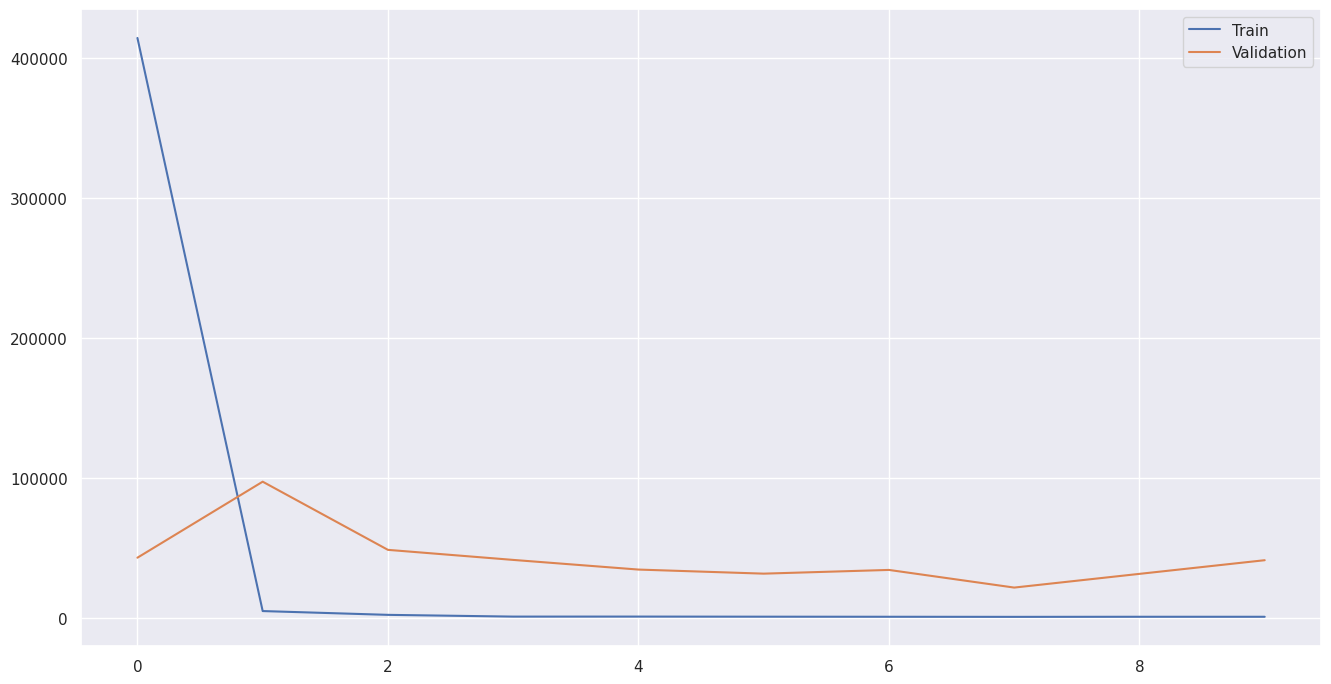

In [73]:
plt.plot(history.history['loss'],label='Train')
plt.plot(history.history['val_loss'],label='Validation')
plt.legend()

In [74]:
# demonstrate prediction
# choose a number of time steps
n_steps_in, n_steps_out = 10, 1
# split data into samples
X, y = split_sequence(data_test.Close, n_steps_in, n_steps_out)
print(X.shape)
x_input = X.reshape((X.shape[0], X.shape[1], n_features))
yhat_1 = model.predict(x_input, verbose=0)
print(yhat_1)

(2861, 10)
[[ 7498.044 ]
 [ 7531.553 ]
 [ 7310.3125]
 ...
 [16578.31  ]
 [16658.54  ]
 [16712.932 ]]


In [75]:
test_mean_1 = np.mean(yhat_1,axis=1)
print(test_mean_1)

[ 7498.044   7531.553   7310.3125 ... 16578.31   16658.54   16712.932 ]


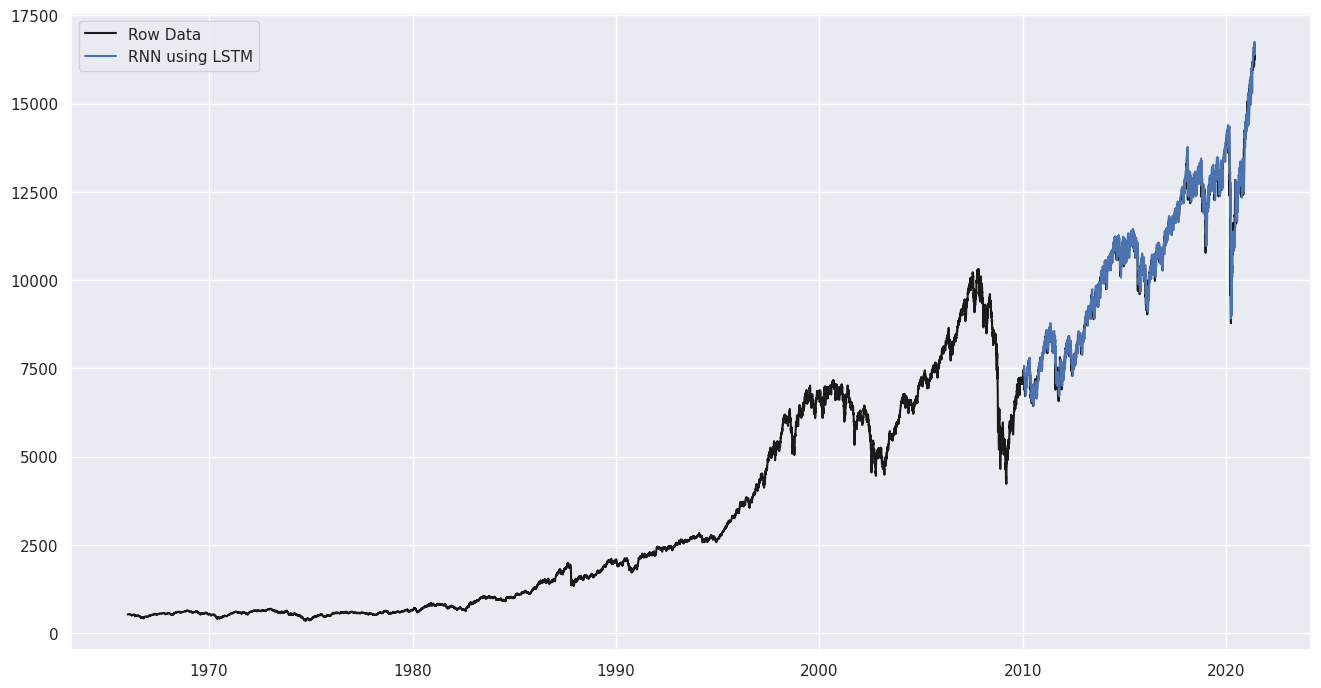

In [76]:
plt.plot(df_NYA_data_close_withoutnan.Date,df_NYA_data_close_withoutnan.Close,'k',label='Row Data')
plt.plot(data_test.Date[10:],test_mean_1,label='RNN using LSTM')
plt.legend()

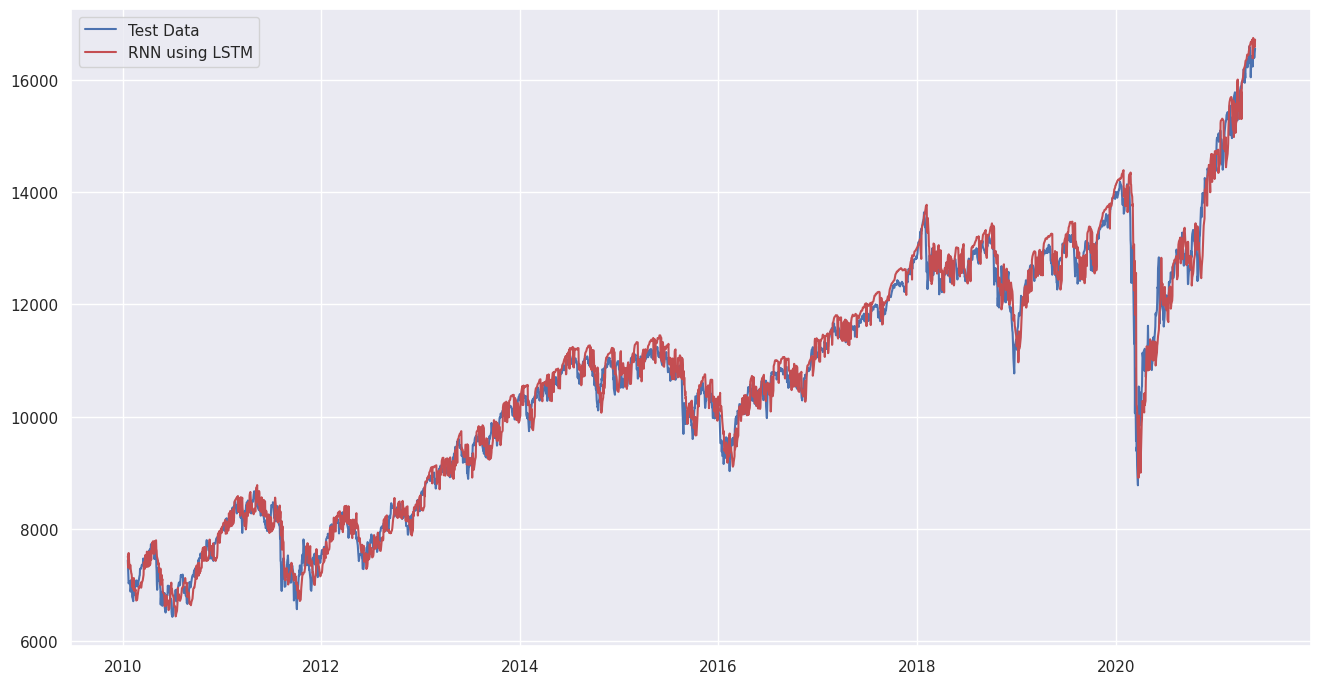

In [77]:
plt.plot(data_test.Date[10:],data_test.Close[10:],'-b',label='Test Data')
plt.plot(data_test.Date[10:],test_mean_1,'r',label='RNN using LSTM')
plt.legend()

In [78]:
r2_score(data_test.Close[10:], test_mean_1)

0.9798508262050207

In [79]:
mean_squared_error(data_test.Close[10:],test_mean_1)

97855.47915988944

In [80]:
((test_mean_1-data_test.Close[10:])**2).sum()/len(test_mean_1)

97855.47915988944

In [81]:
((test_mean_1-data_test.Close[10:])**2).mean()

97855.47915988944

In [82]:
# choose a number of time steps
n_steps_in, n_steps_out = 10, 9
# split into samples
X, y = split_sequence(data_train.Close, n_steps_in, n_steps_out)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
print(X.shape)

(11058, 10, 1)


In [83]:
# define model
model = Sequential()
model.add(LSTM(200, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(200, activation='relu', return_sequences=True))
model.add(LSTM(200, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 10, 200)           161600    
                                                                 
 lstm_4 (LSTM)               (None, 10, 200)           320800    
                                                                 
 lstm_5 (LSTM)               (None, 200)               320800    
                                                                 
 dense_1 (Dense)             (None, 9)                 1809      
                                                                 
Total params: 805,009
Trainable params: 805,009
Non-trainable params: 0
_________________________________________________________________


In [84]:
# fit model
history = model.fit(X, y, epochs=10, verbose=2, validation_split=0.33)

Epoch 1/10
232/232 - 25s - loss: 483525.2812 - accuracy: 0.1107 - val_loss: 108312.3125 - val_accuracy: 0.1164 - 25s/epoch - 110ms/step
Epoch 2/10
232/232 - 21s - loss: 3187.1196 - accuracy: 0.1454 - val_loss: 66730.6328 - val_accuracy: 0.1268 - 21s/epoch - 89ms/step
Epoch 3/10
232/232 - 19s - loss: 1274.2039 - accuracy: 0.1444 - val_loss: 71418.9219 - val_accuracy: 0.0844 - 19s/epoch - 84ms/step
Epoch 4/10
232/232 - 21s - loss: 1269.2299 - accuracy: 0.1316 - val_loss: 58410.7188 - val_accuracy: 0.0860 - 21s/epoch - 90ms/step
Epoch 5/10
232/232 - 20s - loss: 1172.9185 - accuracy: 0.1085 - val_loss: 53524.2461 - val_accuracy: 0.0899 - 20s/epoch - 85ms/step
Epoch 6/10
232/232 - 20s - loss: 1230.8478 - accuracy: 0.1000 - val_loss: 56738.3633 - val_accuracy: 0.0784 - 20s/epoch - 88ms/step
Epoch 7/10
232/232 - 23s - loss: 1230.3771 - accuracy: 0.1088 - val_loss: 60439.0430 - val_accuracy: 0.0734 - 23s/epoch - 99ms/step
Epoch 8/10
232/232 - 20s - loss: 1302.3206 - accuracy: 0.1268 - val_loss

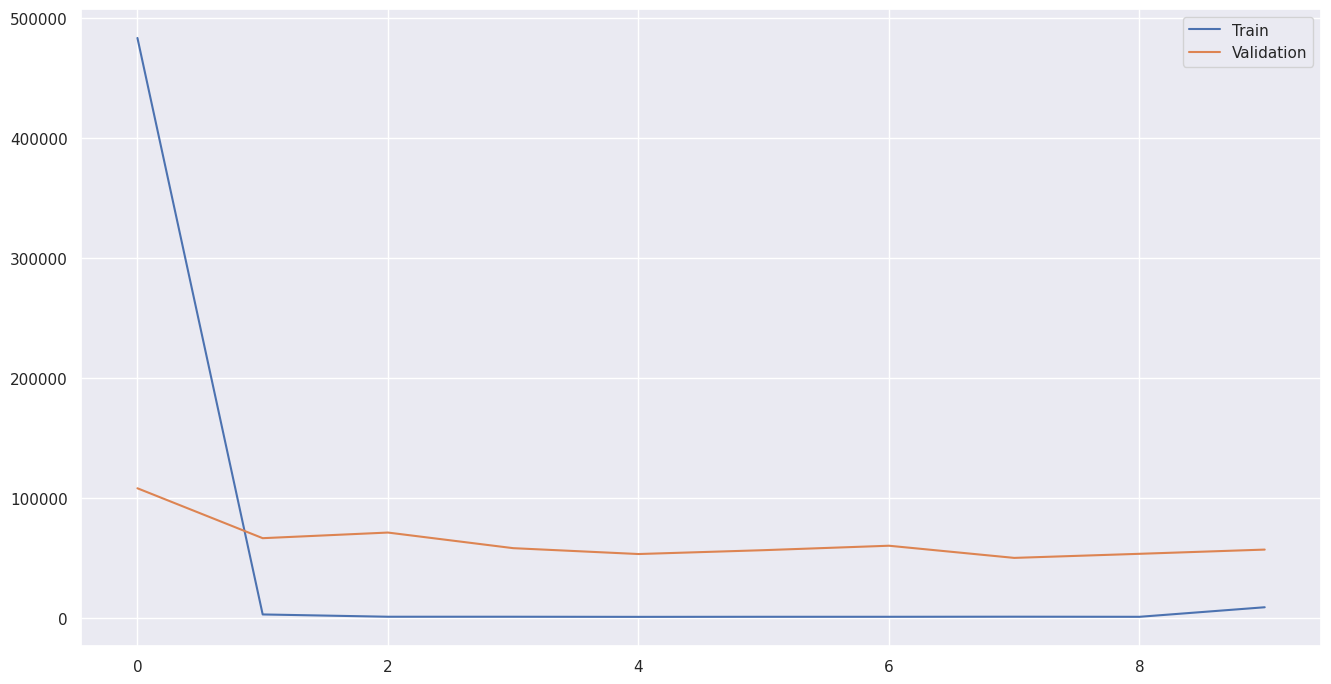

In [85]:
plt.plot(history.history['loss'],label='Train')
plt.plot(history.history['val_loss'],label='Validation')
plt.legend()

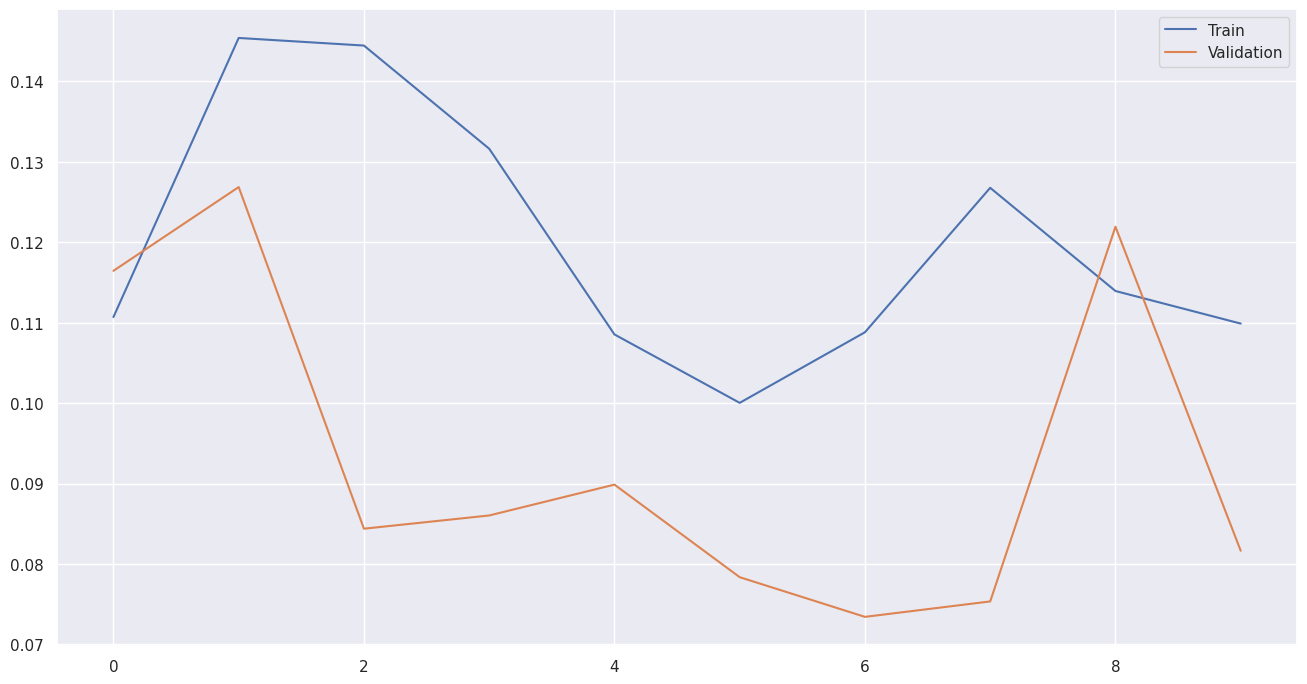

In [86]:
plt.plot(history.history['accuracy'],label='Train')
plt.plot(history.history['val_accuracy'],label='Validation')
plt.legend()

In [87]:
# demonstrate prediction
# choose a number of time steps
n_steps_in, n_steps_out = 10, 9
# split data into samples
X, y = split_sequence(data_test.Close, n_steps_in, n_steps_out)
print(X.shape)
x_input = X.reshape((X.shape[0], X.shape[1], n_features))
yhat_2 = model.predict(x_input, verbose=0)
print(yhat_2)

(2853, 10)
[[ 7352.795   7342.274   7420.8945 ...  7390.2173  7366.452   7361.3345]
 [ 7379.8516  7378.9473  7459.4165 ...  7424.693   7396.658   7399.9927]
 [ 7385.2734  7373.629   7451.1567 ...  7419.23    7392.935   7396.502 ]
 ...
 [16210.504  16175.164  16357.572  ... 16297.477  16217.734  16217.662 ]
 [16258.746  16237.205  16427.734  ... 16364.13   16274.389  16289.093 ]
 [16275.207  16250.3125 16429.842  ... 16375.441  16283.058  16290.52  ]]


In [88]:
test_mean_2 = np.mean(yhat_2,axis=1)

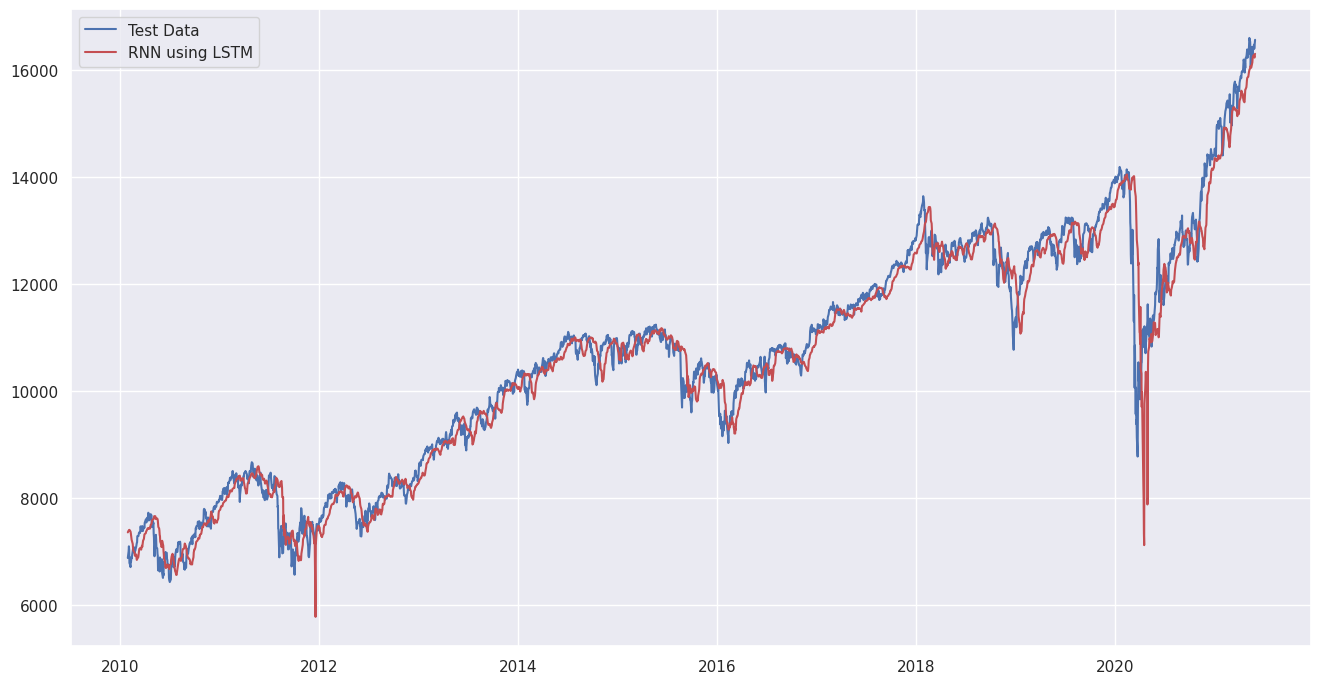

In [89]:
plt.plot(data_test.Date[18:],data_test.Close[18:],'-b',label='Test Data')
plt.plot(data_test.Date[18:],test_mean_2,'r',label='RNN using LSTM')
plt.legend()

In [90]:
r2_score(data_test.Close[18:], test_mean_2)

0.9600498551998767

In [91]:
mean_squared_error(data_test.Close[18:],test_mean_2)

193224.44722519384

In [92]:
# choose a number of time steps
n_steps_in, n_steps_out = 3, 2
# split data into samples
X, y = split_sequence(data_train.Close, n_steps_in, n_steps_out)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
print(X.shape)

(11072, 3, 1)


In [93]:
# model
model = Sequential()
model.add(LSTM(200, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(200, activation='relu', return_sequences=True))
model.add(LSTM(200, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 3, 200)            161600    
                                                                 
 lstm_7 (LSTM)               (None, 3, 200)            320800    
                                                                 
 lstm_8 (LSTM)               (None, 200)               320800    
                                                                 
 dense_2 (Dense)             (None, 2)                 402       
                                                                 
Total params: 803,602
Trainable params: 803,602
Non-trainable params: 0
_________________________________________________________________


In [94]:
# fit model
history = model.fit(X, y, epochs=10, verbose=2, validation_split=0.33)

Epoch 1/10
232/232 - 13s - loss: 502265.5000 - accuracy: 0.5129 - val_loss: 12227.5039 - val_accuracy: 0.4683 - 13s/epoch - 56ms/step
Epoch 2/10
232/232 - 8s - loss: 270.2913 - accuracy: 0.4973 - val_loss: 13567.2568 - val_accuracy: 0.4819 - 8s/epoch - 34ms/step
Epoch 3/10
232/232 - 7s - loss: 232.5101 - accuracy: 0.5097 - val_loss: 12885.8096 - val_accuracy: 0.4907 - 7s/epoch - 32ms/step
Epoch 4/10
232/232 - 8s - loss: 227.1042 - accuracy: 0.5078 - val_loss: 12979.5176 - val_accuracy: 0.4915 - 8s/epoch - 33ms/step
Epoch 5/10
232/232 - 8s - loss: 234.7305 - accuracy: 0.5046 - val_loss: 11660.2988 - val_accuracy: 0.4781 - 8s/epoch - 34ms/step
Epoch 6/10
232/232 - 7s - loss: 222.1805 - accuracy: 0.5154 - val_loss: 12558.7051 - val_accuracy: 0.4937 - 7s/epoch - 32ms/step
Epoch 7/10
232/232 - 8s - loss: 211.0343 - accuracy: 0.5112 - val_loss: 12930.8906 - val_accuracy: 0.5134 - 8s/epoch - 34ms/step
Epoch 8/10
232/232 - 8s - loss: 223.3047 - accuracy: 0.4925 - val_loss: 16795.4551 - val_acc

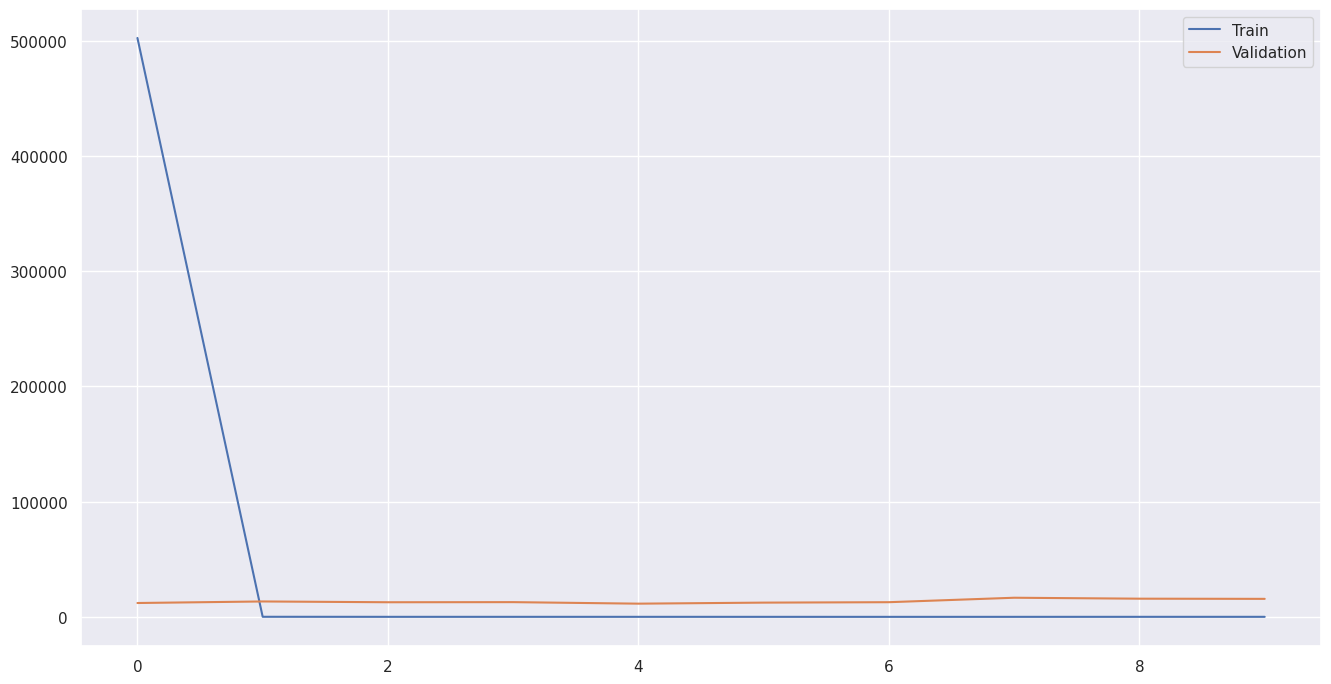

In [95]:
plt.plot(history.history['loss'],label='Train')
plt.plot(history.history['val_loss'],label='Validation')
plt.legend()
#plt.ylim(0,10000)

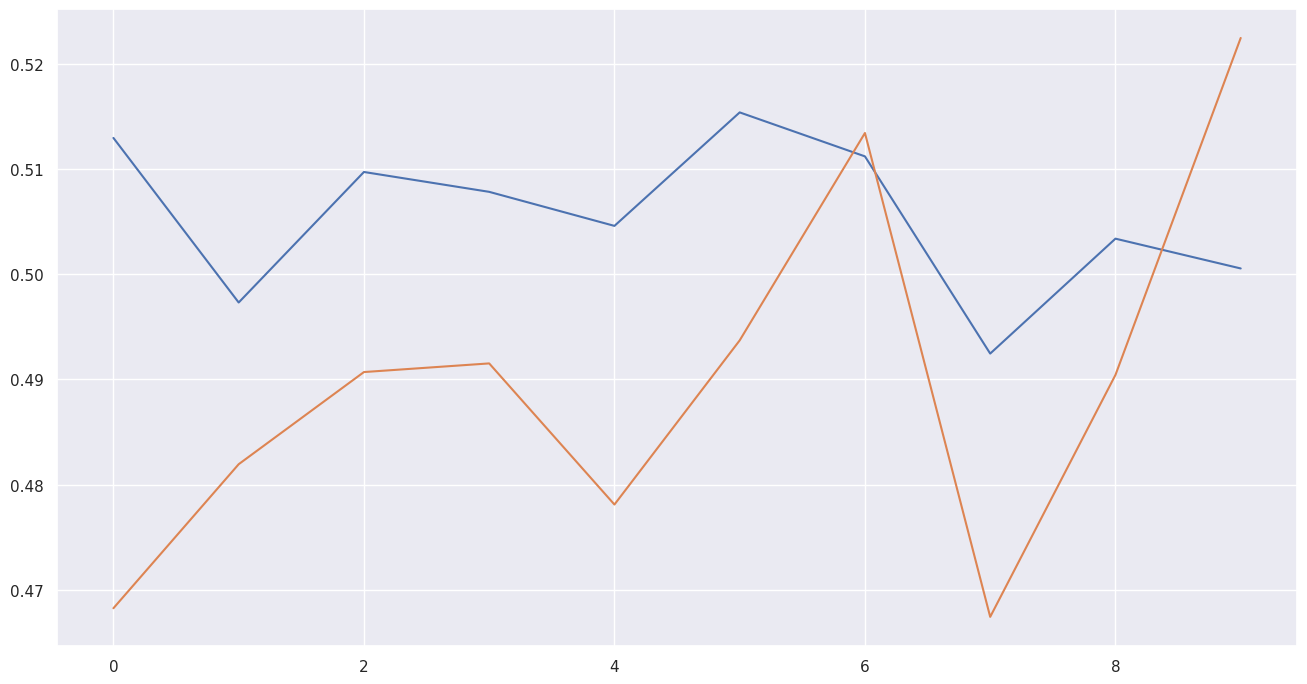

In [96]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [97]:
# demonstrate prediction
# choose a number of time steps
n_steps_in, n_steps_out = 3, 2
# split data into samples
X, y = split_sequence(data_test.Close, n_steps_in, n_steps_out)
print(X.shape)
x_input = X.reshape((X.shape[0], X.shape[1], n_features))
yhat_3 = model.predict(x_input, verbose=0)
print(yhat_3)

(2867, 3)
[[ 7317.7676  7334.522 ]
 [ 7343.48    7360.1206]
 [ 7365.109   7381.9653]
 ...
 [16253.563  16290.396 ]
 [16289.819  16325.598 ]
 [16332.63   16368.898 ]]


In [98]:
test_mean_3 = np.mean(yhat_3,axis=1)

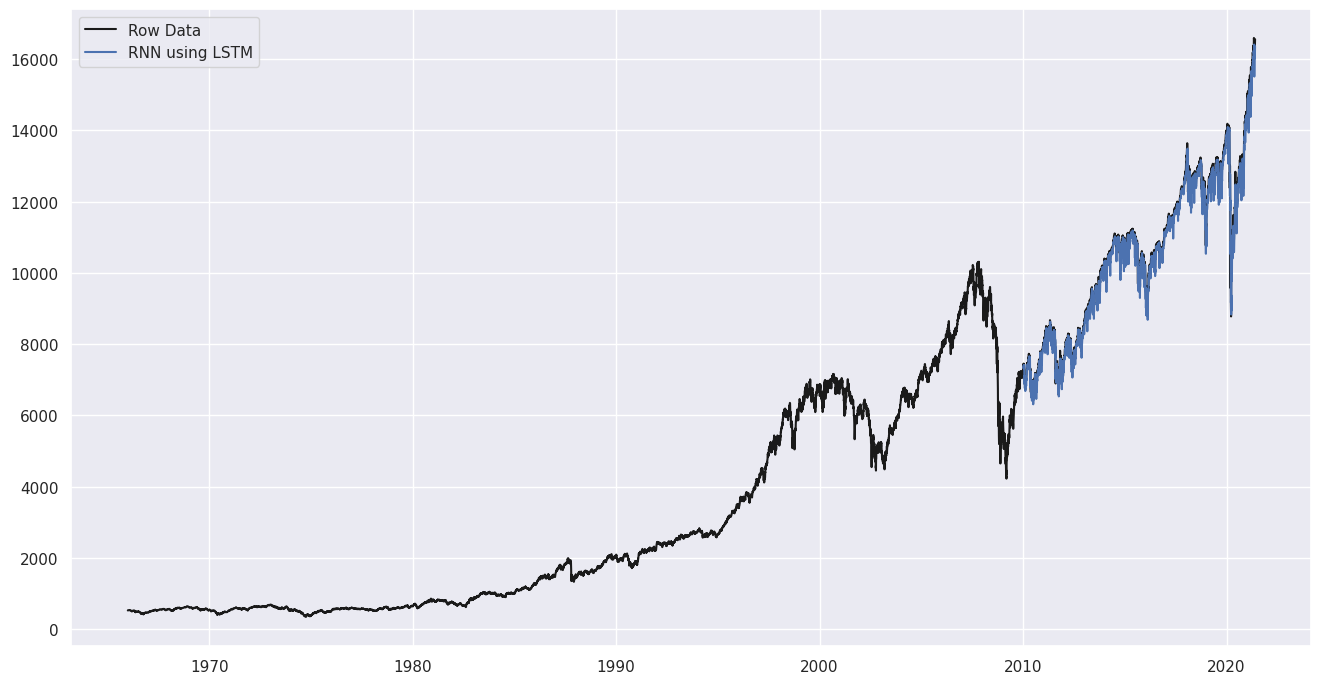

In [99]:
plt.plot(df_NYA_data_close_withoutnan.Date,df_NYA_data_close_withoutnan.Close,'k',label='Row Data')
plt.plot(data_test.Date[4:],test_mean_3,label='RNN using LSTM')
plt.legend()

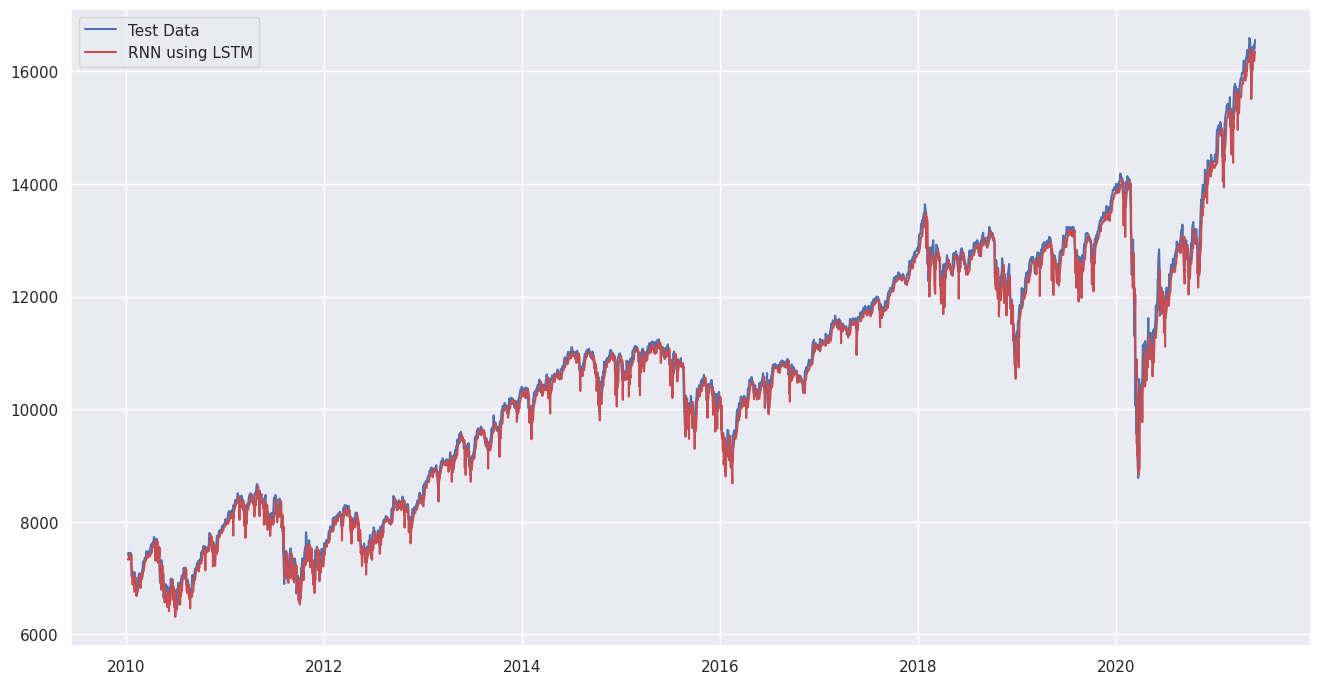

In [100]:
plt.plot(data_test.Date[4:],data_test.Close[4:],'-b',label='Test Data')
plt.plot(data_test.Date[4:],test_mean_3,'r',label='RNN using LSTM')
plt.legend()

In [101]:
r2_score(data_test.Close[4:], test_mean_3)

0.9911574202461143

In [102]:
mean_squared_error(data_test.Close[4:],test_mean_3)

43040.173339620174

In [103]:
data_train_N100 = df_N100_data_close_withoutnan[df_N100_data_close_withoutnan.Date < "2015-01-01"]
data_test_N100 = df_N100_data_close_withoutnan[df_N100_data_close_withoutnan.Date >= "2015-01-01"]

In [104]:
# choose a number of time steps
n_steps_in, n_steps_out = 3, 2
# split into samples
X, y = split_sequence(data_train_N100.Close, n_steps_in, n_steps_out)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
print(X.shape)

(3830, 3, 1)


In [105]:
# define model
model = Sequential()
model.add(LSTM(200, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(200, activation='relu', return_sequences=True))
model.add(LSTM(200, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 3, 200)            161600    
                                                                 
 lstm_10 (LSTM)              (None, 3, 200)            320800    
                                                                 
 lstm_11 (LSTM)              (None, 200)               320800    
                                                                 
 dense_3 (Dense)             (None, 2)                 402       
                                                                 
Total params: 803,602
Trainable params: 803,602
Non-trainable params: 0
_________________________________________________________________


In [106]:
# fit model
history = model.fit(X, y, epochs=10, verbose=2, validation_split=0.33)

Epoch 1/10
81/81 - 7s - loss: 408425.5625 - accuracy: 0.5156 - val_loss: 1312.6322 - val_accuracy: 0.5261 - 7s/epoch - 83ms/step
Epoch 2/10
81/81 - 3s - loss: 857.8696 - accuracy: 0.5039 - val_loss: 163.5253 - val_accuracy: 0.4866 - 3s/epoch - 31ms/step
Epoch 3/10
81/81 - 3s - loss: 247.2093 - accuracy: 0.5078 - val_loss: 153.1034 - val_accuracy: 0.5316 - 3s/epoch - 41ms/step
Epoch 4/10
81/81 - 3s - loss: 234.7300 - accuracy: 0.5094 - val_loss: 142.7992 - val_accuracy: 0.5008 - 3s/epoch - 32ms/step
Epoch 5/10
81/81 - 2s - loss: 220.4321 - accuracy: 0.5109 - val_loss: 133.3983 - val_accuracy: 0.5063 - 2s/epoch - 30ms/step
Epoch 6/10
81/81 - 2s - loss: 192.2583 - accuracy: 0.5214 - val_loss: 137.3940 - val_accuracy: 0.5071 - 2s/epoch - 30ms/step
Epoch 7/10
81/81 - 2s - loss: 186.8834 - accuracy: 0.5156 - val_loss: 113.0296 - val_accuracy: 0.4921 - 2s/epoch - 30ms/step
Epoch 8/10
81/81 - 3s - loss: 178.5753 - accuracy: 0.4984 - val_loss: 111.8720 - val_accuracy: 0.5071 - 3s/epoch - 43ms/s

(0.0, 1000.0)

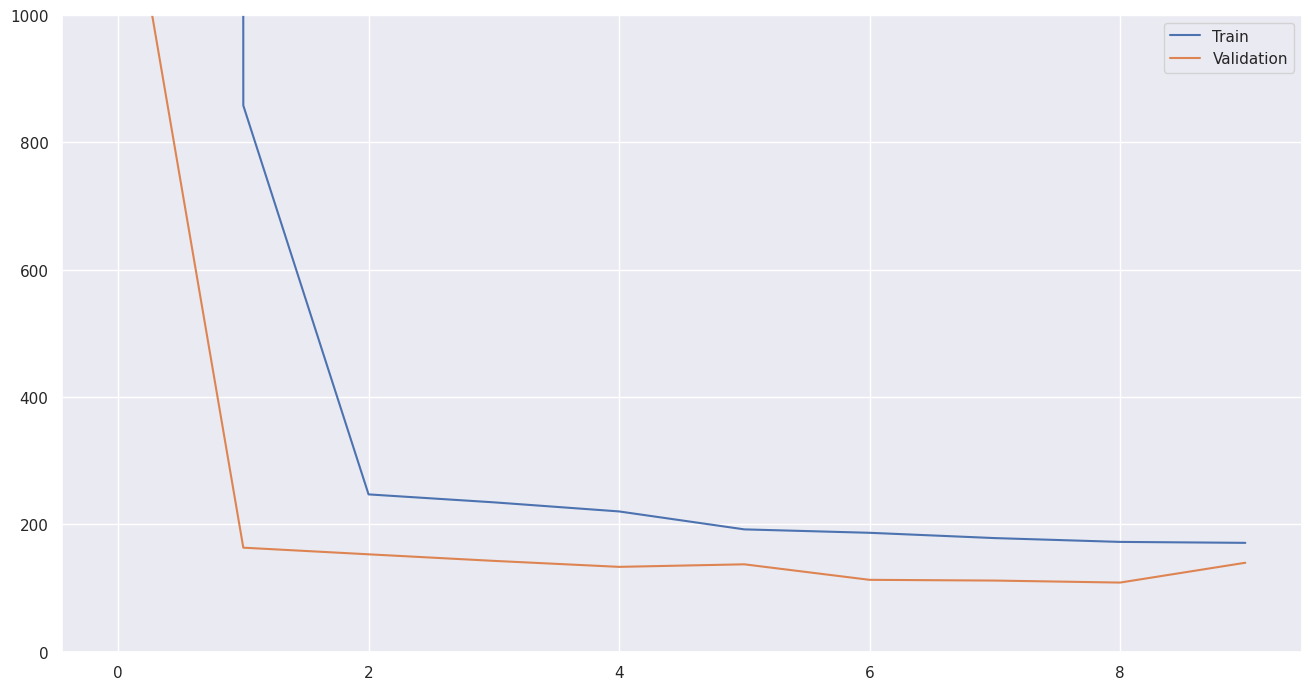

In [107]:
plt.plot(history.history['loss'],label='Train')
plt.plot(history.history['val_loss'],label='Validation')
plt.legend()
plt.ylim(0,1000)

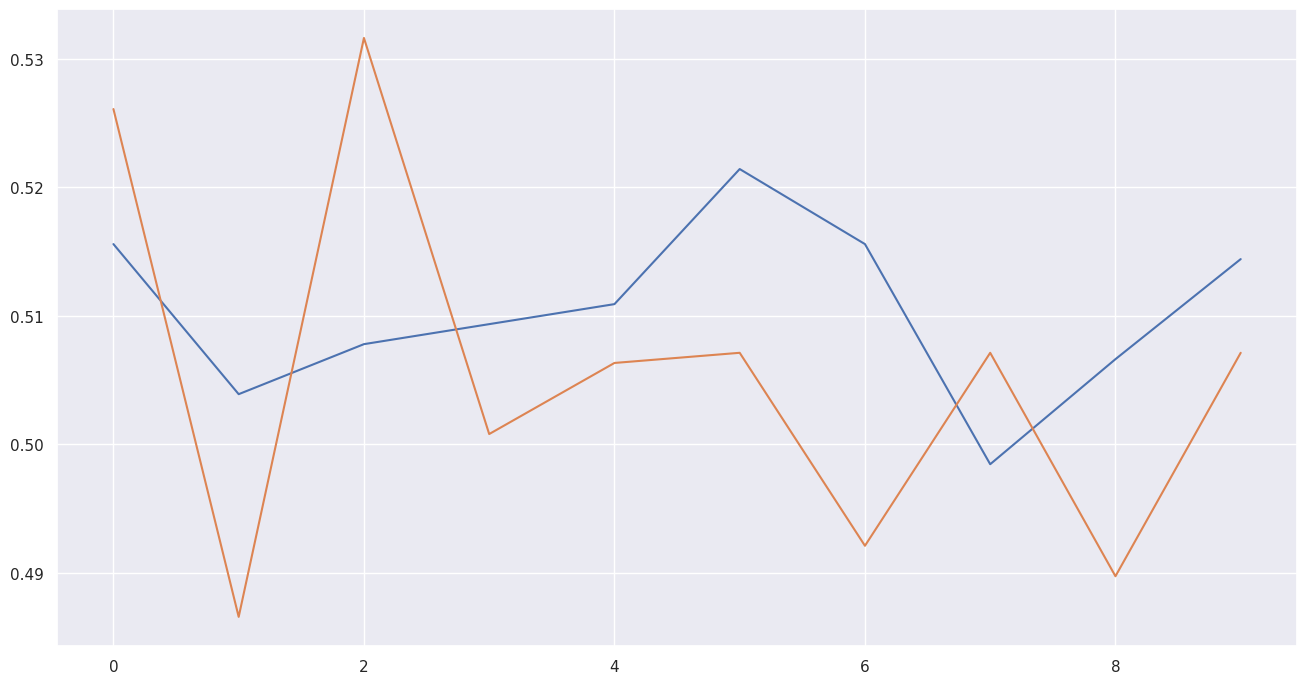

In [108]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [109]:
# demonstrate prediction
# choose a number of time steps
n_steps_in, n_steps_out = 3, 2
# split into samples
X, y = split_sequence(data_test_N100.Close, n_steps_in, n_steps_out)
print(X.shape)
x_input = X.reshape((X.shape[0], X.shape[1], n_features))
yhat_N100 = model.predict(x_input, verbose=0)
print(yhat_N100)

(1636, 3)
[[ 800.88135  805.07227]
 [ 802.1086   803.294  ]
 [ 828.88135  820.54376]
 ...
 [1230.7838  1231.579  ]
 [1245.1449  1245.2406 ]
 [1234.7622  1236.2509 ]]


In [110]:
test_mean_N100 = np.mean(yhat_N100,axis=1)
test_mean_N100

array([ 802.9768,  802.7013,  824.7125, ..., 1231.1814, 1245.1927,
       1235.5066], dtype=float32)

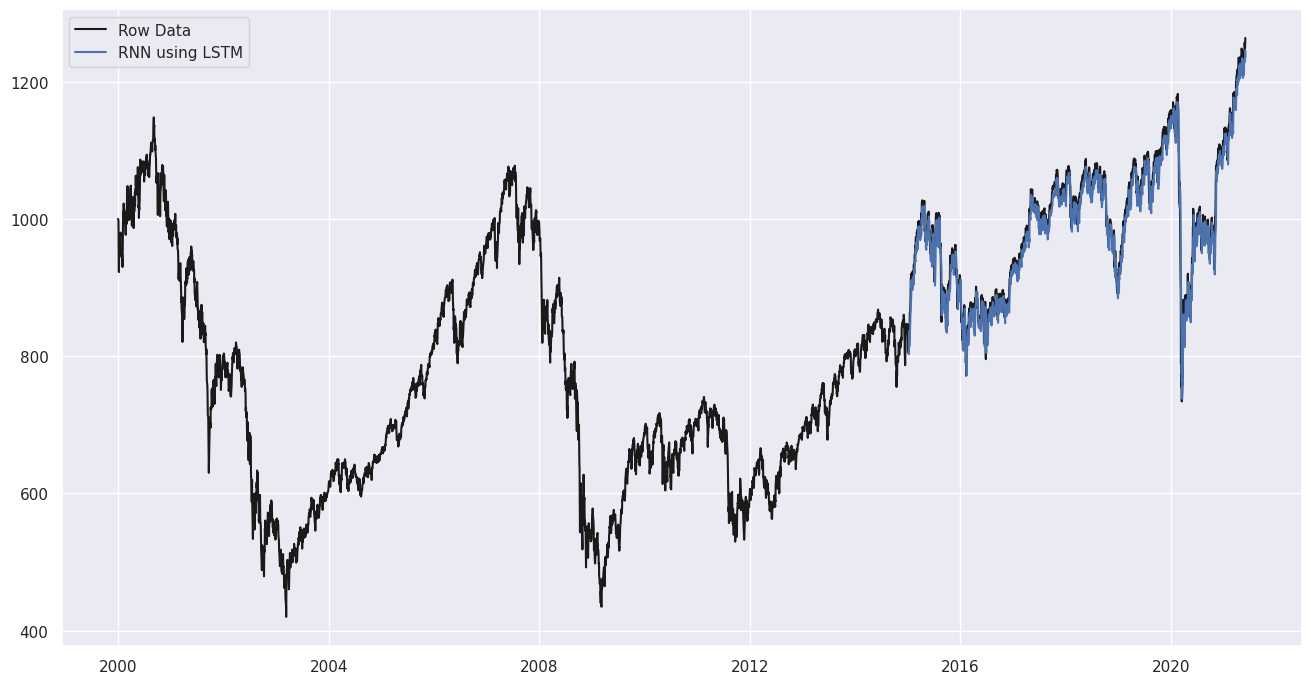

In [111]:
plt.plot(df_N100_data_close_withoutnan.Date,df_N100_data_close_withoutnan.Close,'k',label='Row Data')
plt.plot(data_test_N100.Date[4:],test_mean_N100,label='RNN using LSTM')
plt.legend()

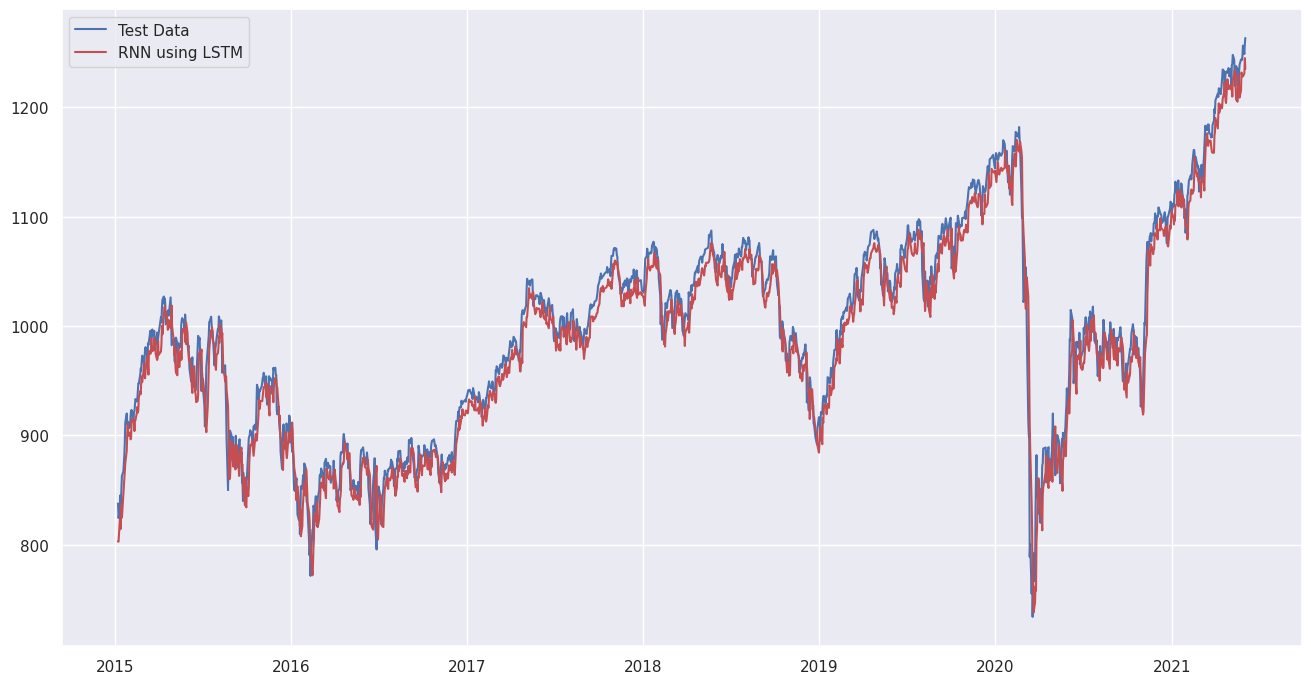

In [112]:
plt.plot(data_test_N100.Date[4:],data_test_N100.Close[4:],'-b',label='Test Data')
plt.plot(data_test_N100.Date[4:],test_mean_N100,'r',label='RNN using LSTM')
plt.legend()

In [113]:
r2_score(data_test_N100.Close[4:], test_mean_N100)

0.9587350389159142

In [114]:
mean_squared_error(data_test_N100.Close[4:],test_mean_N100)

375.42468791646814

In [115]:
# choose a number of time steps
n_steps_in, n_steps_out = 10, 1
# split into samples
X, y = split_sequence(data_train_N100.Close, n_steps_in, n_steps_out)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
print(X.shape)

(3824, 10, 1)


In [116]:
# define model
model = Sequential()
model.add(LSTM(200, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(200, activation='relu', return_sequences=True))
model.add(LSTM(200, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 10, 200)           161600    
                                                                 
 lstm_13 (LSTM)              (None, 10, 200)           320800    
                                                                 
 lstm_14 (LSTM)              (None, 200)               320800    
                                                                 
 dense_4 (Dense)             (None, 1)                 201       
                                                                 
Total params: 803,401
Trainable params: 803,401
Non-trainable params: 0
_________________________________________________________________


In [117]:
# fit model
history = model.fit(X, y, epochs=10, verbose=2, validation_split=0.33)

Epoch 1/10
81/81 - 12s - loss: 220209.6094 - accuracy: 0.0000e+00 - val_loss: 477.6261 - val_accuracy: 0.0000e+00 - 12s/epoch - 146ms/step
Epoch 2/10
81/81 - 8s - loss: 654.2684 - accuracy: 0.0000e+00 - val_loss: 347.6459 - val_accuracy: 0.0000e+00 - 8s/epoch - 94ms/step
Epoch 3/10
81/81 - 7s - loss: 584.1238 - accuracy: 0.0000e+00 - val_loss: 374.4041 - val_accuracy: 0.0000e+00 - 7s/epoch - 85ms/step
Epoch 4/10
81/81 - 7s - loss: 778.3722 - accuracy: 0.0000e+00 - val_loss: 365.6642 - val_accuracy: 0.0000e+00 - 7s/epoch - 89ms/step
Epoch 5/10
81/81 - 8s - loss: 514.2382 - accuracy: 0.0000e+00 - val_loss: 214.2203 - val_accuracy: 0.0000e+00 - 8s/epoch - 101ms/step
Epoch 6/10
81/81 - 7s - loss: 474.2932 - accuracy: 0.0000e+00 - val_loss: 228.6770 - val_accuracy: 0.0000e+00 - 7s/epoch - 82ms/step
Epoch 7/10
81/81 - 8s - loss: 371.2741 - accuracy: 0.0000e+00 - val_loss: 250.8491 - val_accuracy: 0.0000e+00 - 8s/epoch - 95ms/step
Epoch 8/10
81/81 - 7s - loss: 367.4679 - accuracy: 0.0000e+00 

(0.0, 1000.0)

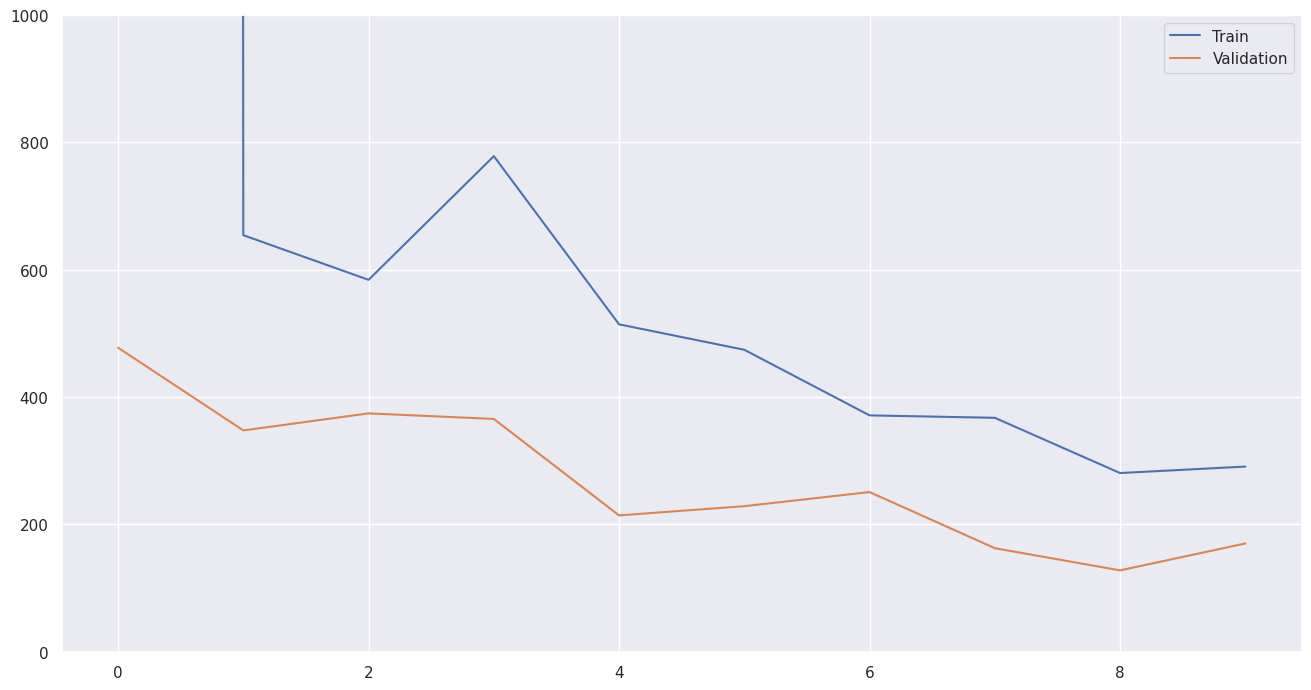

In [118]:
plt.plot(history.history['loss'],label='Train')
plt.plot(history.history['val_loss'],label='Validation')
plt.legend()
plt.ylim(0,1000)

In [119]:
# demonstrate prediction
# choose a number of time steps
n_steps_in, n_steps_out = 10, 1
# split into samples
X, y = split_sequence(data_test_N100.Close, n_steps_in, n_steps_out)
print(X.shape)
x_input = X.reshape((X.shape[0], X.shape[1], n_features))
yhat_N100_3 = model.predict(x_input, verbose=0)
print(yhat_N100_3)

(1630, 10)
[[ 845.766  ]
 [ 847.33923]
 [ 850.8326 ]
 ...
 [1237.1792 ]
 [1234.1669 ]
 [1240.44   ]]


In [120]:
test_mean_N100_3 = np.mean(yhat_N100_3,axis=1)
test_mean_N100_3

array([ 845.766  ,  847.33923,  850.8326 , ..., 1237.1792 , 1234.1669 ,
       1240.44   ], dtype=float32)

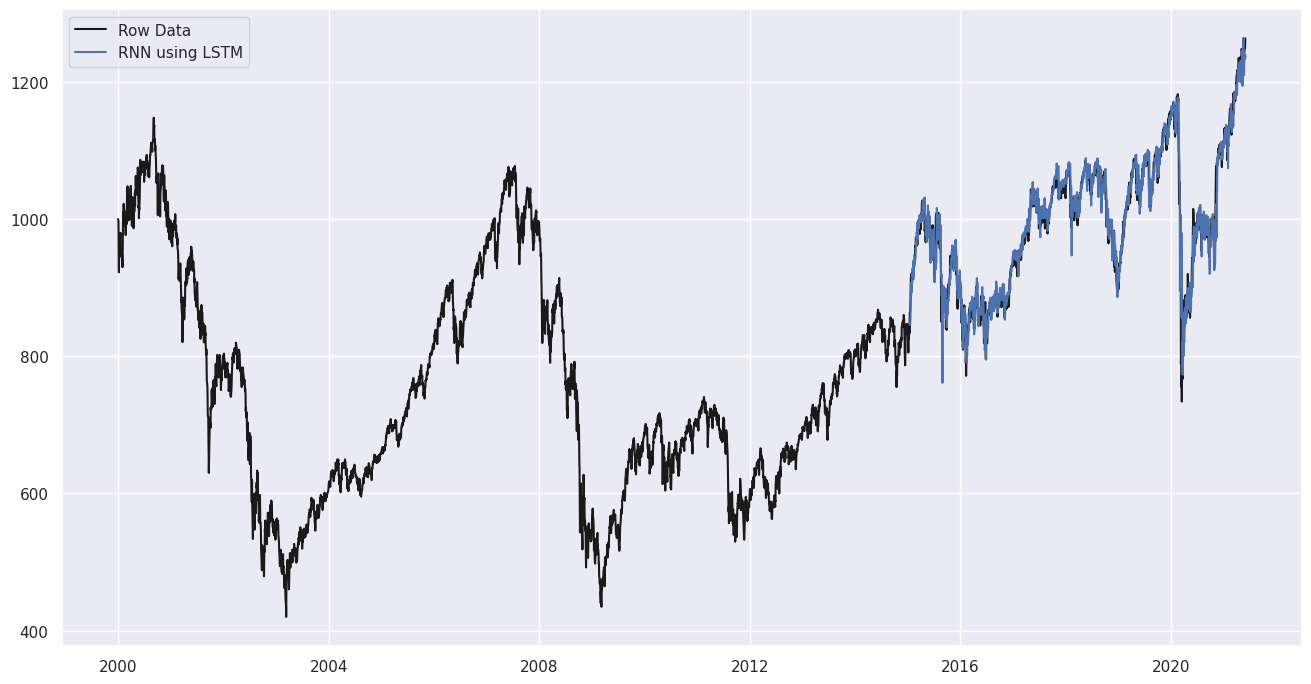

In [121]:
plt.plot(df_N100_data_close_withoutnan.Date,df_N100_data_close_withoutnan.Close,'k',label='Row Data')
plt.plot(data_test_N100.Date[10:],test_mean_N100_3,label='RNN using LSTM')
plt.legend()

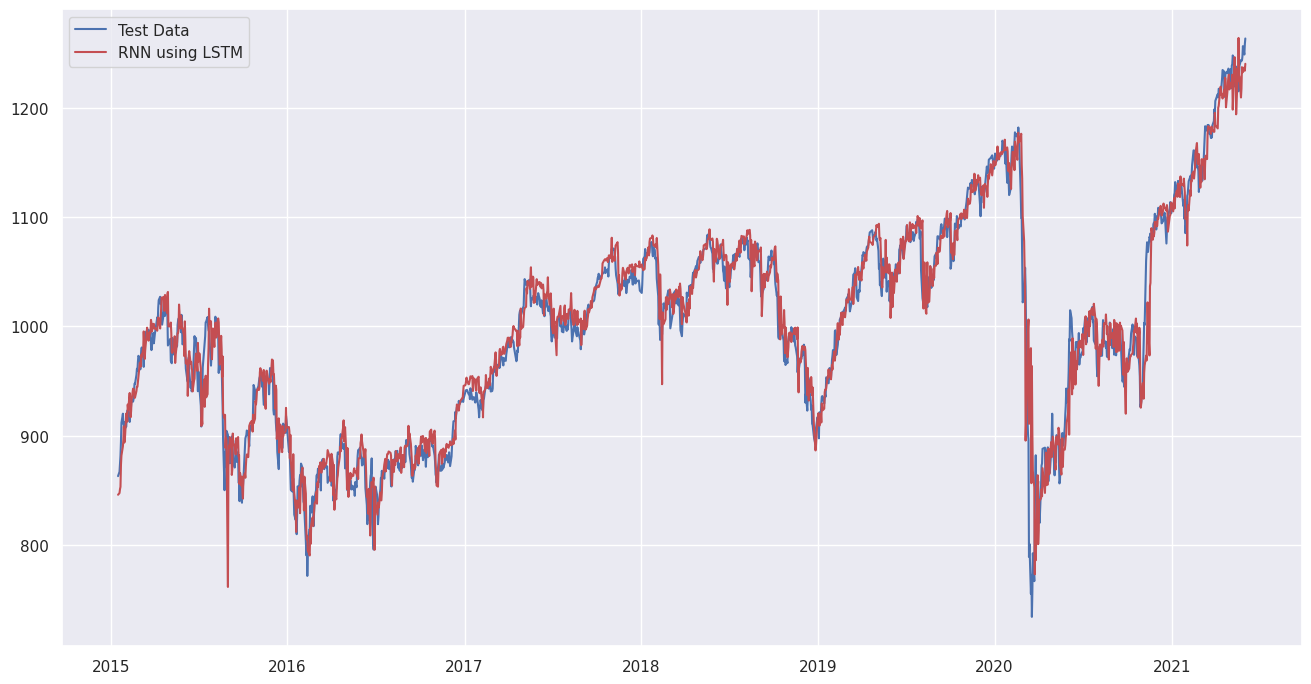

In [122]:
plt.plot(data_test_N100.Date[10:],data_test_N100.Close[10:],'-b',label='Test Data')
plt.plot(data_test_N100.Date[10:],test_mean_N100_3,'r',label='RNN using LSTM')
plt.legend()

In [123]:
r2_score(data_test_N100.Close[10:], test_mean_N100_3)

0.9471397834736895

In [124]:
mean_squared_error(data_test_N100.Close[10:],test_mean_N100_3)

477.73616793189325